# Homework 3 of "Fundamentals of 3D Computer Vision"
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> Professor Shohreh Kasaei </h2>
<h3 style = "color: cyan"> Related TA: AmirHossein Razlighi <h3>
<h4 style = "color: white"> Ask your questions via quera or <a href="mailto:arazlighi@gmail.com">email</a></h4>
<h5> Save your file with format: STUDENT NUMBER_HW3.ipynb or .zip </h5>
</div>

## Question 1: Understanding Rotations in-depth! [45 points]

In this question, we want to visualize some rotations in 3D Space. we will get to understand what are quaternions, and rotation matrices. We will also see how to convert between these representations.

### Quaternions
We know that going from _Real Numbers_ which are 1 dimensional to _Complex Numbers_, we add an axis such that:
$$
Complex\_Number = a + bi
$$
$$
a , b \in \mathbb{R}
$$

Now, what are quaternions? Let's add an axis to the complex numbers! That is quite abstract such that we can not even imagine what it means, right? But it turns out to be a powerful mathematical approach for representing rotations! Let's see how we can represent quaternions:

$$
Quaternion = a + bi + cj + dk
$$
$$
a , b , c , d \in \mathbb{R}
$$

where $i , j , k$ are the imaginary units.

<div style = "text-align:center"><img src="./Images/axis-angle.png" /></div>

As you can see, these abstract terms actually mean something! The first parameter (namely, $a$ in our example) is the angle of rotation and the rest, show the vector of rotation. So, we can represent a rotation in 3D space with a quaternion. But how can we convert between quaternions and rotation matrices? Let's see!

In [ ]:
%pip install numpy matplotlib plotly nbformat scipy

**Note**: You **CAN *NOT*** use ready to use Rotation functions such as `scipy.spatial.transforms` or `cv2`. You should implement the functions yourself. The imported `scipy` library is used in another cases further (and to test your code).

[35 points]

In [2]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

class Rotation:
    def __init__(self):
        pass

    def from_quat(self, w, x, y, z):
        self.w = w
        self.x = x 
        self.y = y
        self.z = z
        return self

    def from_matrix(self, matrix):
        w = np.sqrt(1+matrix[0,0]+matrix[1,1]+matrix[2,2])/2
        x = (matrix[2,1]-matrix[1,2])/(4*w)
        y = (matrix[0,2]-matrix[2,0])/(4*w)
        z = (matrix[1,0]-matrix[0,1])/(4*w)
        return self.from_quat(w, x, y, z)        

    def as_matrix(self):
        w, x, y, z = self.w, self.x, self.y, self.z
        to_return = np.array([
            [1 - 2 * y * y - 2 * z * z, 2 * x * y - 2 * z * w, 2 * x * z + 2 * y * w],
            [2 * x * y + 2 * z * w, 1 - 2 * x * x - 2 * z * z, 2 * y * z - 2 * x * w],
            [2 * x * z - 2 * y * w, 2 * y * z + 2 * x * w, 1 - 2 * x * x - 2 * y * y]
        ])
        return to_return

    def as_quat(self):
        as_quat_return = np.array([self.w, self.x, self.y, self.z])
        return as_quat_return

    def apply(self, vector):
        rot_matrix = self.as_matrix()
        return rot_matrix @ vector        

## Visualizing a Quaternion [10 points]

Here, we want to rotate a sample vector in 3D space w.r.t a quaternion. You can use the `Rotation` class that you defined above. Visualze the original vector, the rotation vector (which is shown by x, y and z components of quaternion) and the final rotated vector.

In [21]:
original_vector = np.array([3, 5, 7])
original_vector = original_vector / np.linalg.norm(original_vector)

rotation_quaternion = np.array([0.25, 0.5, 0.15, 0.05]) # in the order (q_0, q_1, q_2, q_3)

rotation_object = Rotation().from_quat(*rotation_quaternion)
rotation_matrix = rotation_object.as_matrix()

rotation_axis_quat = rotation_object.as_quat()

rotated_vector = rotation_object.apply(original_vector)


fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=[0, original_vector[0]],
        y=[0, original_vector[1]],
        z=[0, original_vector[2]],
        name='Original Vector'
    )
)

fig.add_trace(
    go.Scatter3d(
        x=[0, rotation_axis_quat[1]],
        y=[0, rotation_axis_quat[2]],
        z=[0, rotation_axis_quat[3]],
        name='Rotation'
    )
)

fig.add_trace(
    go.Scatter3d(
        x=[0, rotated_vector[0]],
        y=[0, rotated_vector[1]],
        z=[0, rotated_vector[2]],
        name='Rotated Vector'
    )
)

fig.update_layout(title='Rotation Visualizer', width=800, height=400)
fig.show()

### Testing your implementations 
(Your implementations should pass the tests below. **Don't** change the codes in these cells. Just run them!)

In [22]:
from scipy.spatial.transform import Rotation as R

# Testing your code (Do not change this part of the code)
for i in range(5):
    original_vector = np.random.rand(3)
    original_vector = original_vector / np.linalg.norm(original_vector)
    rotation_quaternion = np.random.rand(4)
    rotation_quaternion = rotation_quaternion / np.linalg.norm(rotation_quaternion)
    rotation_object = Rotation().from_quat(*rotation_quaternion)
    rotation_matrix = rotation_object.as_matrix()
    rotated_vector = rotation_object.apply(original_vector)
    assert np.allclose(
        rotation_matrix,
        R.from_quat(rotation_quaternion[[1, 2, 3, 0]]).as_matrix(),
        atol=1e-6,
        rtol=1e-6,
    )

    assert np.allclose(
        rotated_vector,
        R.from_quat(rotation_quaternion[[1, 2, 3, 0]]).apply(original_vector),
        atol=1e-6,
        rtol=1e-6,
    )

In [23]:
# Testing your code (Do not change this part of the code)
for i in range(5):
    original_vector = np.random.rand(3)
    original_vector = original_vector / np.linalg.norm(original_vector)
    rotation_matrix = R.random().as_matrix()
    rotation_object = Rotation().from_matrix(rotation_matrix)
    rotation_quaternion = rotation_object.as_quat()
    rotated_vector = rotation_object.apply(original_vector)
    
    assert np.allclose(
        rotation_quaternion,
        R.from_matrix(rotation_matrix).as_quat()[[3, 0, 1, 2]],
        atol=1e-6,
        rtol=1e-6,
    ) or np.allclose(
        rotation_quaternion,
        -R.from_matrix(rotation_matrix).as_quat()[[3, 0, 1, 2]],
        atol=1e-6,
        rtol=1e-6,
    )

    assert np.allclose(
        rotated_vector,
        R.from_matrix(rotation_matrix).apply(original_vector),
        atol=1e-6,
        rtol=1e-6,
    )

# Question 2: Estimating Camera Pose from 2D-3D correspondences [55 points]

In this question, you are given a set of 2D-3D correspondences. You are also given the intrinsic parameters of the camera. You need to estimate the pose of the camera (R & T) in the world coordinate system. Let's start!

- Step1: Creating the dataset (Corresponding 3d-2d points):
  
  Just run the cell below without changing it!

In [24]:
from scipy.spatial.transform import Rotation as R
import numpy as np

rot = R.random().as_matrix()
trans = np.array([5, 10, 15])

_3d_points = np.random.rand(100, 3)
_3d_points = _3d_points - np.mean(_3d_points, axis=0)
_3d_points_normalized = _3d_points / np.linalg.norm(_3d_points, axis=1)[:, None]


_2d_points = []
for i in range(100):
    _2d_points.append(rot @ _3d_points_normalized[i] + trans)

_2d_points = np.array(_2d_points)
_2d_points[:, :] /= _2d_points[:, 2][:, None]

[10 points]

In [26]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot with 3D scatter plot for the 3D points
fig_2_parts = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter'}]])
fig_1_part = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])


# 3D Scatter plot
fig_2_parts.add_trace(
    go.Scatter3d(
        x=_3d_points_normalized[:, 0],
        y=_3d_points_normalized[:, 1],
        z=_3d_points_normalized[:, 2],
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='3D Points'
    ),
    row=1, col=1
)
fig_1_part.add_trace(
    go.Scatter3d(
        x=_3d_points_normalized[:, 0],
        y=_3d_points_normalized[:, 1],
        z=_3d_points_normalized[:, 2],
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='3D Points'
    ),
    row=1, col=1
)

# 2D Scatter plot for the projected points
fig_2_parts.add_trace(
    go.Scatter(
        x=_2d_points[:, 0],
        y=_2d_points[:, 1],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='2D Projected Points'
    ),
    row=1, col=2
)
_2d_points_with_zeros = np.column_stack((_2d_points, np.zeros_like(_2d_points[:, 0])))

fig_1_part.add_trace(
    go.Scatter3d(
        x=_2d_points_with_zeros[:, 0],
        y=_2d_points_with_zeros[:, 1],
        z = _2d_points_with_zeros[:, 2],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='2D Projected Points'
    ),
    row=1, col=1
)

fig_2_parts.update_layout(title='3D and Projected 2D Visualizer', width=800, height=400)
fig_2_parts.show()

fig_1_part.update_layout(title='3D and Projected 2D Visualizer', width=800, height=400)
fig_1_part.show()


### Estimate the Pose matrix(H) using LSE method and the given dataset:

We know that for converting a 3D point to a 2D point, we can use the following equation:
$$
\lambda x = K (RX + T)
$$

Here, for the sake of simplicity, consider $K=I$ and $\lambda = 1$. So, we have:
$$
x = RX + T
$$

We can stack $R \& T$ together in an $H$ matrix (you may seen this as $g$ in the course's slides) and write this as:
$$
x = HX
$$

**Here, the task is simply estimating the matrix $H$, given the data correspondences we had earlier. Use LSE to estimate the matrix H and then print it out. You can use Regularization term and any desired number of iterations to reach your desired accuracy.**

[35 points]

In [27]:
X = np.hstack((_3d_points_normalized, np.ones((_3d_points_normalized.shape[0], 1))))
x = _2d_points

# Least Squares Estimation to estimate H matrix
H, residuals, _, _ = np.linalg.lstsq(X, x, rcond=None)

H = H.reshape((3, 4))

print("Estimated Pose Matrix (H):")
print(H)


Estimated Pose Matrix (H):
[[ 6.18272869e-02 -1.51978949e-02 -1.36590852e-16 -1.84844530e-02]
 [-7.69688083e-02  1.94289029e-16  2.78612631e-02  1.79391514e-02]
 [-2.08166817e-17  3.33597568e-01  6.67623041e-01  1.00000000e+00]]


[10 points]

In [39]:
# Project 3D
projected_2d_points = _3d_points_normalized @ H

# reprojection error
reprojection_error = np.linalg.norm(_2d_points - projected_2d_points[:, :3]) / len(_2d_points)

print("Reprojection Error:", reprojection_error)

Reprojection Error: 0.13299096780302117


## Question 3: Image Mosaicing [**Extra** 30 points]

The task of image mosaicing is something we use everyday to create panoramas. In this question, we want to create a panorama from a set of images. We will use the homography matrix to do so. Let's start!

**NOTE**: You can use `cv2` library and its functions to do the task and there is no need to implement them from scratch.

In [ ]:
%pip install opencv-python

In [77]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

Steps for image mosaicing:

1. Find KeyPoint in 2 images (frame n and frame n+1)
2. Match the keypoints to find the nearest neighbors of each pixel.
3. Estimate the Homography matrix using the matched keypoints.
4. Use the homography matrix to warp the images and create the panorama.

Let's start doing these steps!

### Find Keypoints in 2 images
Read the images from `./Images_Question3`. They are named `image1` to `image4`. Set the origin image to 1st image and the destination image to 2nd. We need to find important features in the images so we can understand the correspondence between them. How? Here we simply use `SIFT` algorithm to find the keypoints. You can use `cv2.SIFT_create()` to create a SIFT object and then use `sift.detectAndCompute()` to find the keypoints and descriptors. You can also use `cv2.drawKeypoints()` to draw the keypoints on the images.

### Match the keypoints to find nearest pixels
Now, we have 2 descriptors of the images, thanks to SIFT! These 2 are used to describe the image and everything in them. Now, we want to find the nearest neighbors of each pixel in origin to find out which pixel is the closest to it, in destination. Here again, you can use opencv functions for ease! Just use BruteForce matcher:
```python
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
```
The `matches` object now contains the matches between these 2 images. you can access each item and it's info in matches. For example:
```
all_matches_idxs = [(m.trainIdx, m.queryIdx) for m, n in matches]
```

### Estimate Homography matrix

What is a homography matrix? You are familiar with _Homogeneous_ Matrices to represent pose of a camera. Now, suppose we see everything in our world as planar! So, we project every 3d point to a specific plane in the world, because in panorama images, we don't care about depth, do we?! Let's loook at the image below to understand it better:

<div style = "text-align:center"><img src="./Images/homography_transformation.jpg" /></div>

You can read more about it (and it's recommended!). But if you don't want to, it's allrigh! You just think of it as a **Transformation between points in image 1 and image 2**. In opencv, we do:
```
(H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC, reprojThreshold)
```


### Use the homography matrix to warp the images and create the panorama
Finally, simply we should bring the image2 corresponding points (in camera view 1) and then append them together in an image. So, We have $H$ which transforms points from view 1 to view 2 and vice verca. We simply use opencv to do the projection:

```
            result = cv2.warpPerspective(
                img1_orig,
                H,
                (img1_orig.shape[1] + img2_orig.shape[1], img1_orig.shape[0]),
            )
            result[0 : img2_orig.shape[0], 0 : img2_orig.shape[1]] = img2_orig
```


[You get all 30 extra points, if you implement **all of the parts** correctly and get the *correct results*!]

In [ ]:
# _. Load the images
# 1. Detect the keypoints and compute the descriptors
# 2. Match the keypoints
# 3. Draw the matches
# 4. Calculate the homographic matrix
# 5. Warp the image
# In each step, you should plot the images that are being matched (for mosaicing), the matched image (using cv2.drawMatchesKnn) and the panorama image created until that step

Image 1 and Image 2
Number of Matches (with threshold of 0.75): 3416


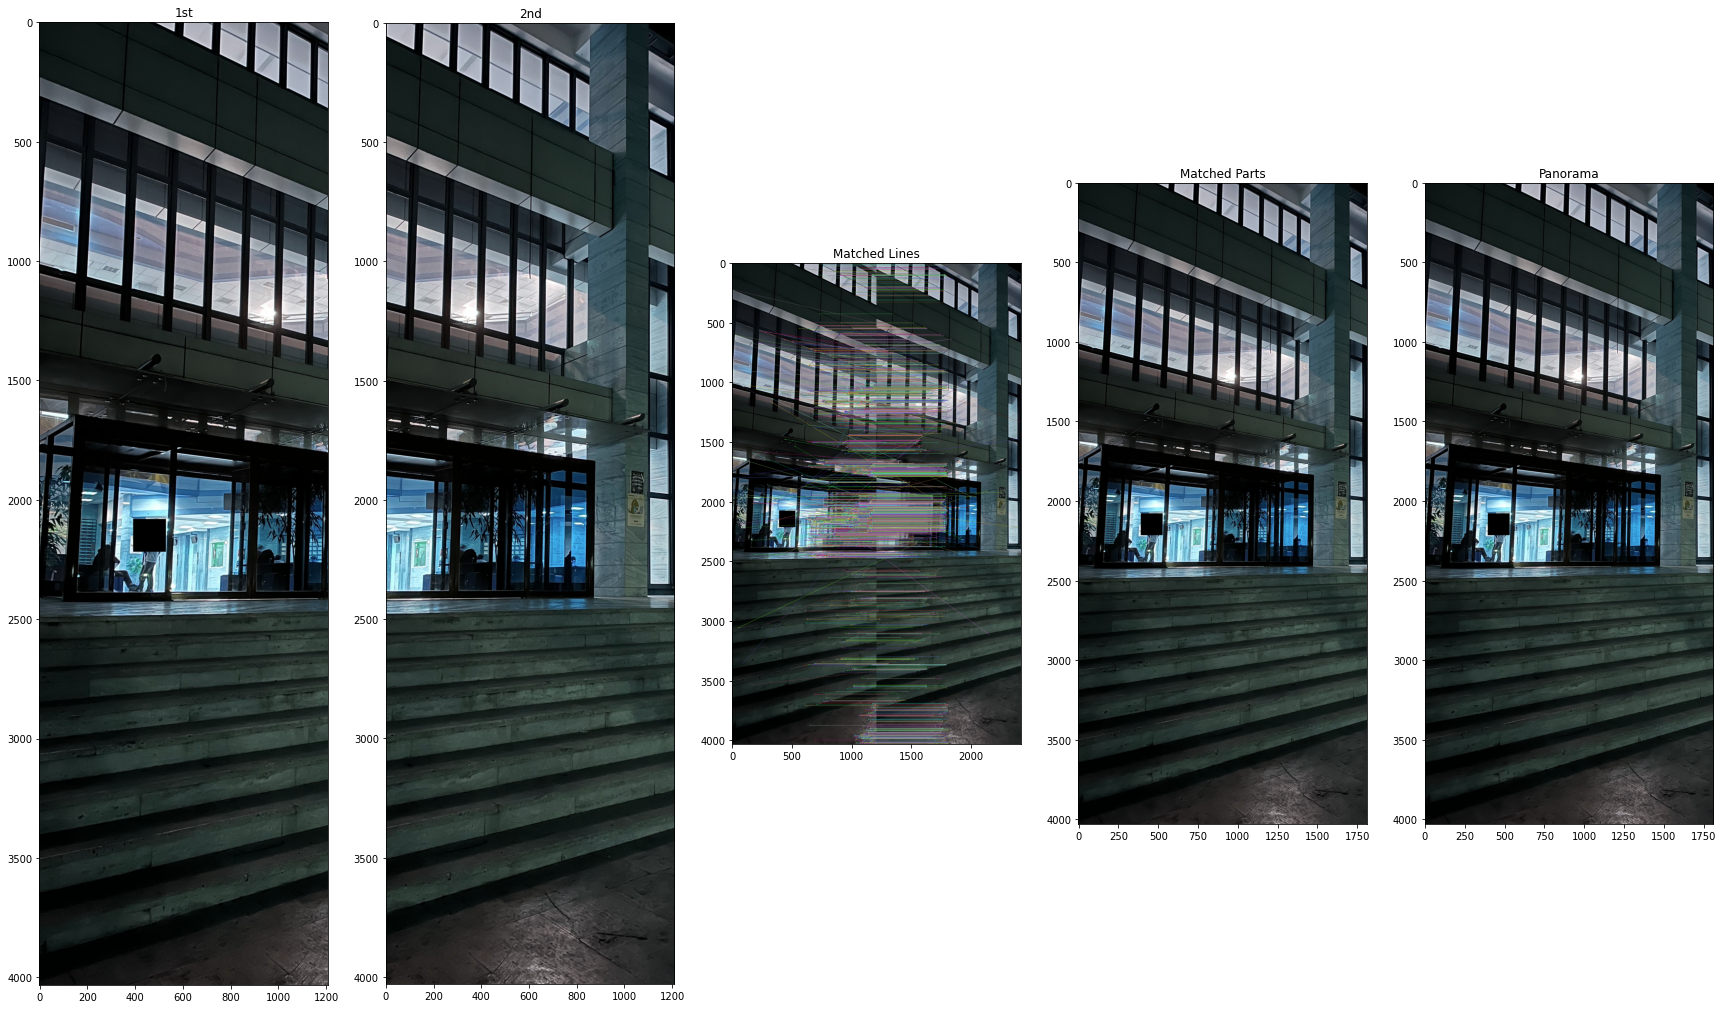

Image 3
Number of Matches (with threshold of 0.75): 4046


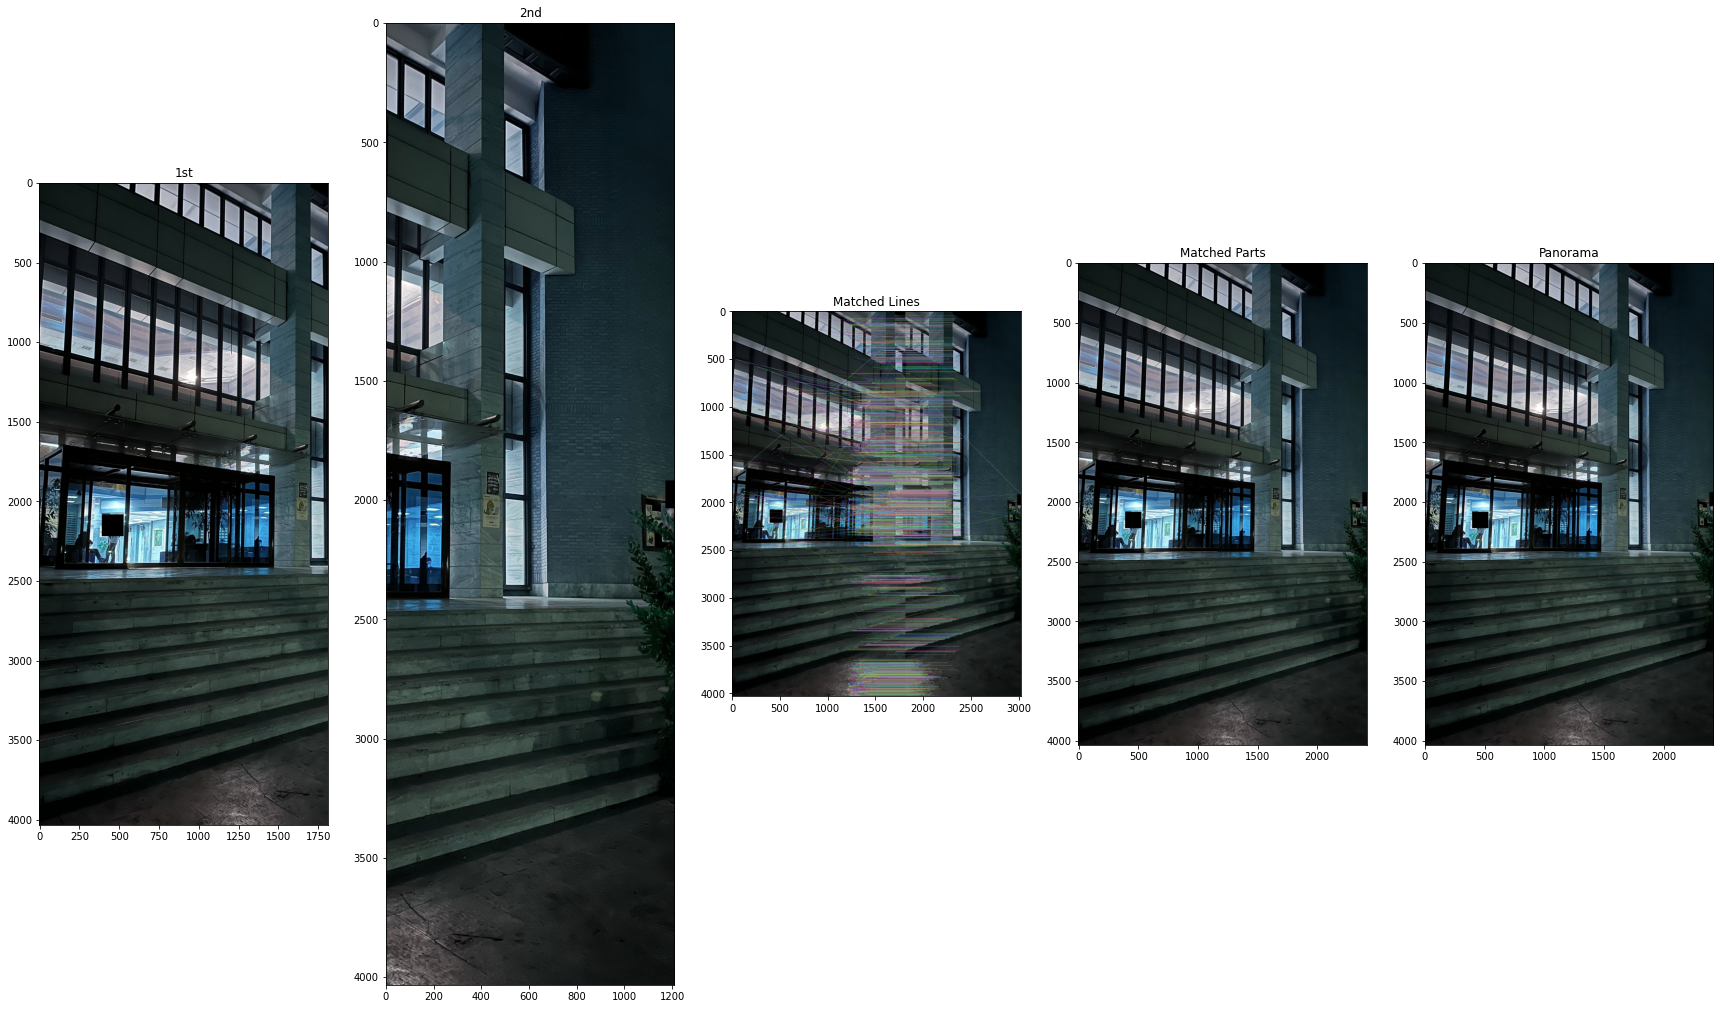

Image 4
Number of Matches (with threshold of 0.75): 2152


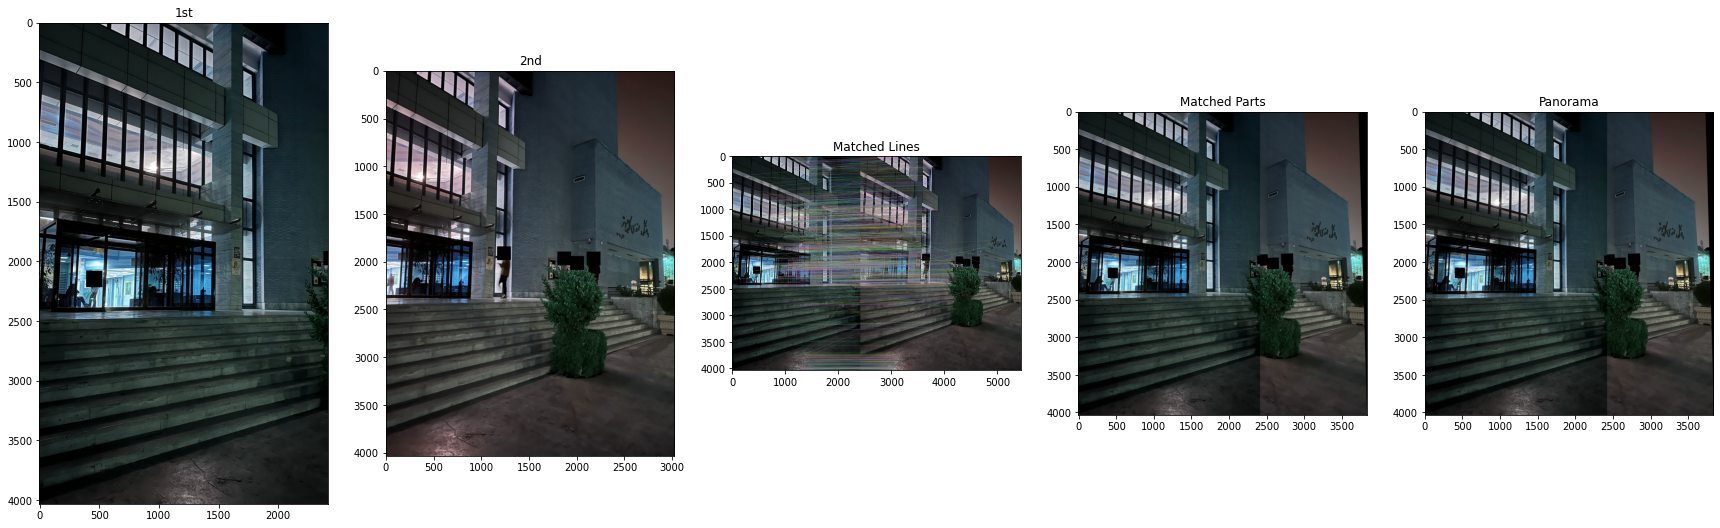

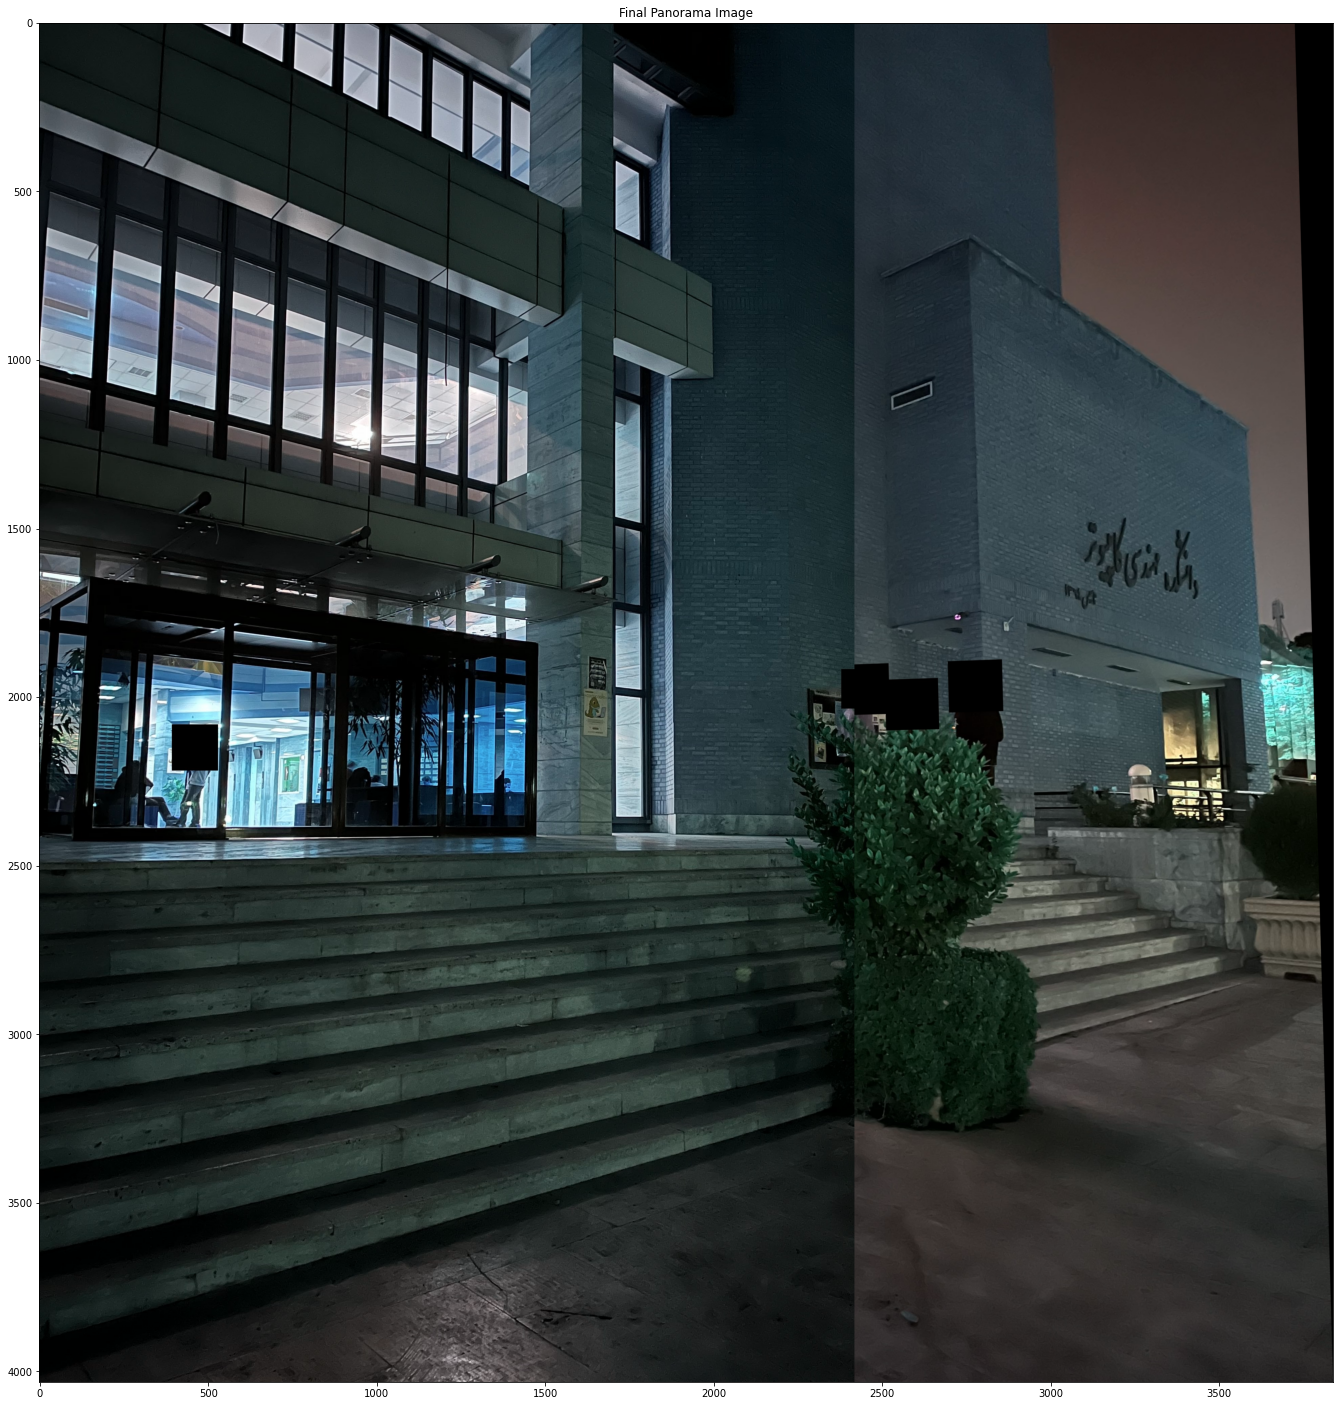

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def stitch_images(imgs):
    gray_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]
    img1_orig = imgs[0]
    img1 = gray_imgs[0]
    # 1. Detect the keypoints and compute the descriptors
    sift = cv2.SIFT_create()
    img1_kp, img1_des = sift.detectAndCompute(img1, None)

    img2_orig = gray_imgs[1]
    img2_kp, img2_des = sift.detectAndCompute(img2_orig, None)

    # 2. Match the keypoints
    bf = cv2.BFMatcher(cv2.NORM_L2)
    matches = bf.knnMatch(img1_des, img2_des, k=2)


    # check for the proper matches (that satisfy aminimum threshold)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    print('Number of Matches (with threshold of 0.75): ' + str(len(good_matches)))
    # 4. Calculate the homographic matrix
    src_pts = np.float32([img1_kp[m.queryIdx].pt for m in good_matches])
    dst_pts = np.float32([img2_kp[m.trainIdx].pt for m in good_matches])
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    result = cv2.warpPerspective(
                imgs[1],
                H,
                (imgs[1].shape[1] + imgs[1].shape[1], imgs[1].shape[0]),
            )
    # This line detects the black parts of the image
    non_black_pixels = np.where(result > 0)
    max_x = np.max(non_black_pixels, axis=1)


    # Crop the image to the non-black region
    plt.figure(figsize=(30, 40))
    plt.subplot(1, 5, 1)
    plt.imshow(imgs[0], cmap='gray')
    plt.title('1st')
            
    plt.subplot(1, 5, 2)
    plt.imshow(imgs[1], cmap='gray')
    plt.title('2nd')

    # 5. Warp the image
    img_matches = cv2.drawMatches(
            imgs[0], img1_kp, imgs[1], img2_kp, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    # 3. Draw the matches
    plt.subplot(1, 5, 3)
    plt.imshow(img_matches, cmap='gray')
    plt.title('Matched Lines')

    result = result[:, :max_x[1], :]
    result[0 : img1_orig.shape[0], 0: img1_orig.shape[1]] = img1_orig

    plt.subplot(1, 5, 4)
    plt.imshow(result, cmap='gray')
    plt.title('Matched Parts')

    
    plt.subplot(1, 5, 5)
    plt.imshow(result)
    plt.title('Panorama')
    plt.show()
    return result

# Load all images
img1 = cv2.imread('./Images_Question3/image1.jpg')
img2 = cv2.imread('./Images_Question3/image2.jpg')
img3 = cv2.imread('./Images_Question3/image3.jpg')
img4 = cv2.imread('./Images_Question3/image4.jpg')

# Image 1 and 2
print('Image 1 and Image 2')
result1 = stitch_images([img1, img2])

# Image 3 and Result1
print('Image 3')
result2 = stitch_images([result1, img3])

# Image 4 and Result2
print('Image 4')
result3 = stitch_images([result2, img4])

# Final panorama
plt.figure(figsize=(25, 25))
plt.imshow(result3)
plt.title('Final Panorama Image')
plt.show()